# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")


# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice.
num_mice= combined_data["Mouse ID"].nunique()
num_mice

249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
num_mice_cleaned

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_vol = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_vol = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_vol = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_vol = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_vol = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_vol,
    'Median Tumor Volume': median_tumor_vol,
    'Tumor Volume Variance': var_tumor_vol,
    'Tumor Volume Std. Dev.': std_tumor_vol,
    'Tumor Volume Std. Err.': sem_tumor_vol
})

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
summary_stats_advanced

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

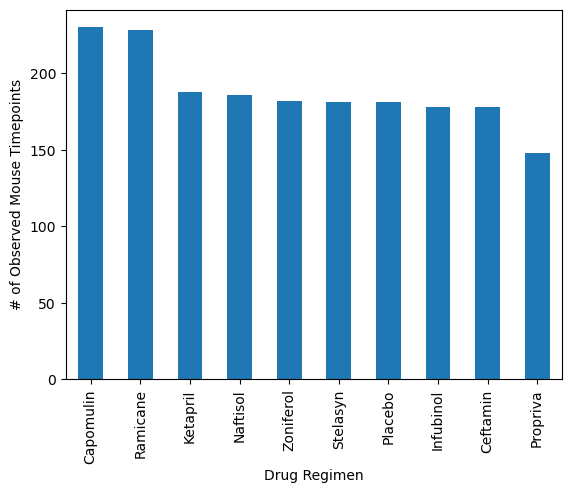

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()

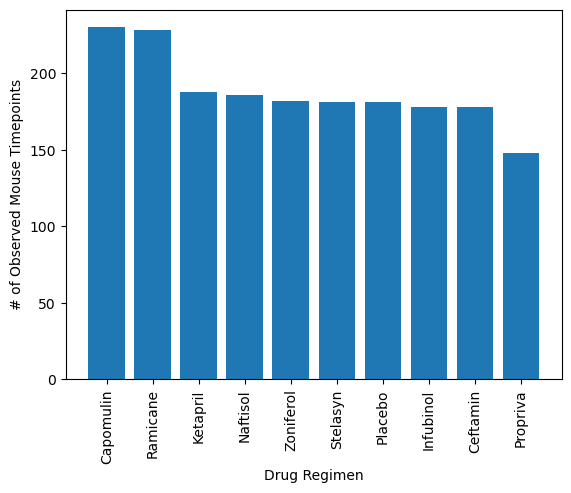

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

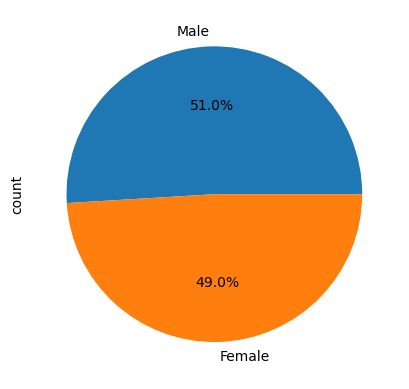

In [33]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_counts = cleaned_data['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%')

# Get the unique mice with their gender


# Make the pie chart
plt.show()

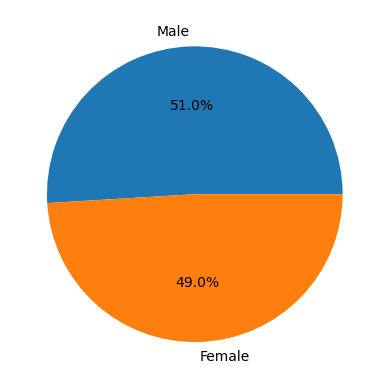

In [34]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
# Get the unique mice with their gender


# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoints = last_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')
treatment_data = merged_data[(merged_data['Drug Regimen'] == 'Capomulin') |
                             (merged_data['Drug Regimen'] == 'Ramicane') |
                             (merged_data['Drug Regimen'] == 'Infubinol') |
                             (merged_data['Drug Regimen'] == 'Ceftamin')]
treatment_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_subset = treatment_data[treatment_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(treatment_subset)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_subset.quantile([.25, .5, .75])
    lower_quartiles = quartiles[0.25]
    upper_quartiles = quartiles[0.75]
    iqr = upper_quartiles - lower_quartiles

    lower_bound = lower_quartiles - (iqr*1.5)
    upper_bound = upper_quartiles + (iqr*1.5)

    outliers = treatment_subset[(treatment_subset < lower_bound) | (treatment_subset > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


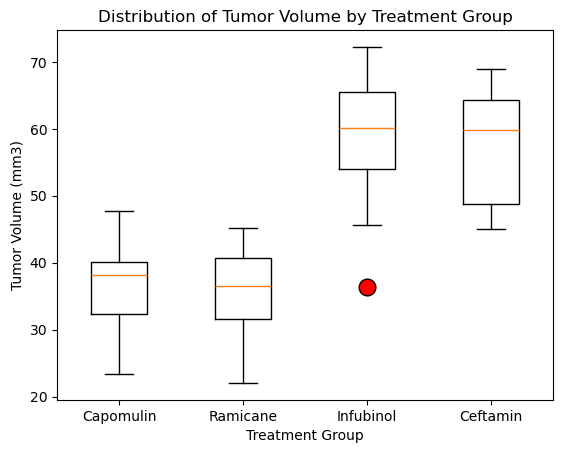

In [41]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'r', 'markersize': 12})
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

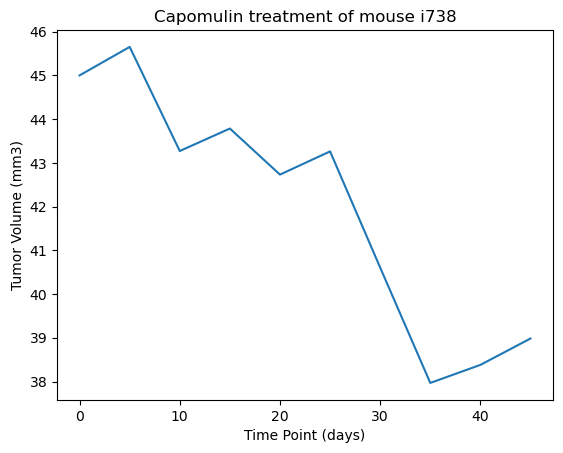

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].unique()[0] 
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse i738')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

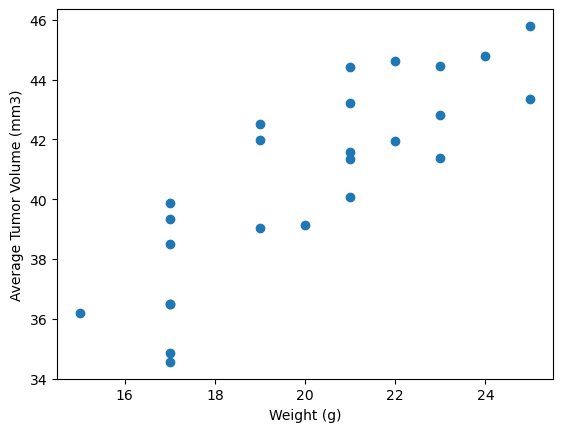

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on="Mouse ID")
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


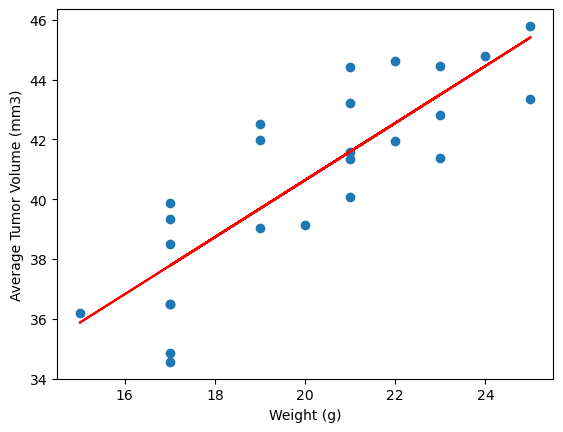

In [72]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].unique()[0] 
weights = capomulin_data.groupby('Mouse ID').first()['Weight (g)']

correlation, _= pearsonr(weights, average_tumor_volume)
rounded_correlation = round(correlation,2)
print(f'The correlation between mouse weight and the average tumor volume is: {rounded_correlation}')

slope, intercept, r_value, p_value, std_err = linregress(weights, average_tumor_volume)
plt.scatter(weights, average_tumor_volume, label='Data points')
plt.plot(weights, slope * weights + intercept, color='red', label='Regression line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()